**Logistik Regression** 

Adında regresyon geçsede bu bir Classification uygulamasıdır.

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [122]:
train_df= pd.read_csv("train.csv")

In [123]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
"""Datamızda eksik veriler var ve çok verimiz olmadığı için bunları silmemeliyiz.
Bu yüzden onları dolduracağız. Bunun iki yöntemi vardır: Mean(oratalama), Median
(ortanca)"""

#train dat içinde eksik değerlere bakalım
#isnull() metodu, her hücrenin boş olup olmadığını kontrol eder
#her bir sütun içindeki toplam boş değer adedi:

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Eksik Değerler - Age**

In [125]:
#Age sütunu için eksik değerlerin oranı

train_df["Age"].isnull().sum() / train_df.shape[0] *100
#train_df.shape[0]:DataFrame'in satır sayısını döndürür. Yani, veri kümesinde kaç veri örneği olduğunu verir.

19.865319865319865

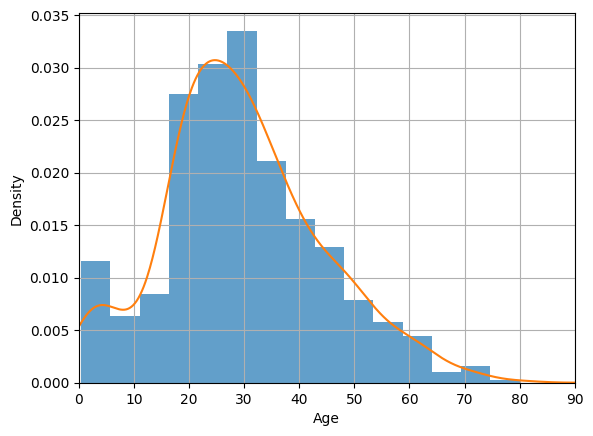

In [126]:
#Yaklaşık %20'lik bşr dilimin yaş değeri eksik
#Bunun histogram grafiği:

"""bins=çubuk sayısı, density=histogramın yüzdelerle normalize edilip edilmediğini
belirtir.ani, toplam alanı 1'e ayarlar. Bu, verilerin yoğunluğunu karşılaştırmak için 
kullanışlıdır. , stacked=eğer veri kümesinde birden fazla grup varsa, çubukları yığın 
haline getirir. Bu, veri grupları arasındaki toplam dağılımı gösterir. eğer veri kümesinde 
birden fazla grup varsa, çubukları yığın haline getirir. Bu, veri grupları arasındaki toplam
dağılımı gösterir. , alpha: ubukların saydamlığını ayarlar. 0'dan 1'e kadar değer alır. 0 
tamamen saydamdır, 1 ise tamamen opaktır. Burada, 0.7 saydamlık kullanılır."""

ax= train_df["Age"].hist(bins= 15, density=True, stacked=True, alpha=0.7)

train_df["Age"].plot(kind="density") #grafiğin türü (kind), yoğunluktur.

ax.set(xlabel="Age")
plt.xlim(0,90)
plt.grid() #arka plandaki kareler
plt.show()

In [127]:
"""şimdi mean ve medyan değerleri hesaplayacağız ama medianı kullanacağız çünkü 
mean bize daha büyük bir değer verecek ama aslında uygun bir değer değil"""

# skipna -> eksik verileri es geç (skip), True ise dikkate al demektir

print("Mean Değeri: ",train_df["Age"].mean(skipna=True))
print("Median Değeri: ",train_df["Age"].median(skipna=True))

Mean Değeri:  29.69911764705882
Median Değeri:  28.0


**Eksik Değerler - Cabin**

In [128]:
# Cabin için eksik değerler oranı

train_df["Cabin"].isnull().sum() / train_df.shape[0]*100

77.10437710437711

Cabin sütununda %77 oranı bilinmiyor, bilinen veri sayısıda çok az bu yüzden bu sütunu komple çıkarcağız.

**Eksik Değerler - Embarked**

In [129]:
#embarked= gemiye binilen kapı

train_df["Embarked"].isnull().sum() / train_df.shape[0]*100

0.22446689113355783

In [130]:
"""value_counts() fonksiyonu, bir pandas Serisi içindeki benzersiz değerlerin 
sayısını sayarak her bir değerin kaç kez tekrarladığını belirler."""

print('Yolcuların hangi limandan bindikleri % olarak: (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df["Embarked"].value_counts() / train_df.shape[0] * 100)

Yolcuların hangi limandan bindikleri % olarak: (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    72.278339
C    18.855219
Q     8.641975
Name: count, dtype: float64


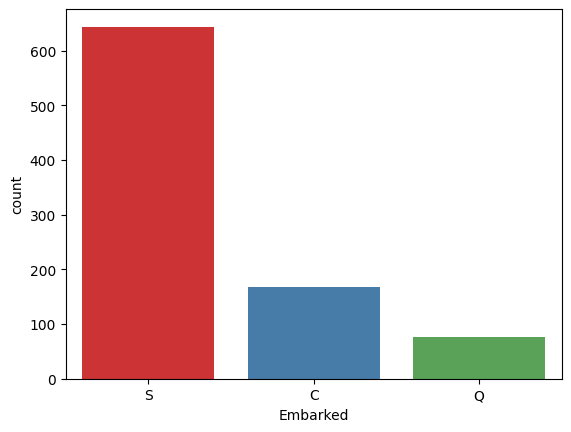

In [131]:
#grafik ile oranı daha net görelim

sns.countplot(x="Embarked", data= train_df, palette="Set1")
plt.show()

Burada sadece 2 adet boşluk var ve bu kategorik bir sütun bu yüzden mean veya median yapılamaz. Bu yüzden en yüksek değere sahip class ile bilinmeyen iki yeri de dolduracağız.

In [132]:
# en fazla binilen limanı bulalım -> idxmax()

print('En fazla binilen liman: ', train_df['Embarked'].value_counts().idxmax())

En fazla binilen liman:  S


**Nihai Karar ve Uygulama**

* Age -> Median yöntemi ile eksik değerleri dolduracağız (median = 28)
* Embarked -> eksik değerleri 'S' olarak dolduracağız
* Cabin -> çok fazla (%77) eksik değer olduğu için bu sütunu çıkaracağız

In [133]:
# önce orijinal verimizi kopyalayalım

train_data= train_df.copy()

In [134]:
# Age -> eksikleri median ile dolduralım -> fillna()

train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)

In [135]:
# Embarked -> eksikleri 'S' ile dolduralım, en çok olan 

train_data["Embarked"].fillna(train_df["Embarked"].value_counts().idxmax(), inplace=True)

In [136]:
# Cabin -> bu sütunu çıkaralım -> drop
train_data.drop("Cabin", axis=1, inplace=True)

In [137]:
# şimdi bu ayarlamalardan sonra train_data'da eksik veri var mı bakalım

train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [138]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Fazladan olan (Gereksiz) Değişken Analizi**

**SibSp:** her çift başına düşen çocuk sayısı

**Parch:** çocuklar için evebeyn sayısı

Gördüğünüz gibi, iki değişken de birbiri ile çok ilgili ve aralında yüksek oranda korelasyon var.

Bu iki değişkeni tek bir değişken altında toplamak daha sağlıklı olacak: **Yanlız mı seyahat ediyor**

Değişkenimizin adı **YalnizSeyahat** olsun. Ve bu kategorik bir değişken olacak. 0 veya 1.

In [139]:
# SibSp ve Parch'a bakıp eğer ikisinin toplamı sıfır'dan büyükse o zaman yanlız seyahat etmiyordur -> 0 diyeceğiz
# eğer toplamları sıfır ise o zaman yanlız seyahat ediyordur -> 1

train_data["YalnizSeyahat"]= np.where((train_data["SibSp"]+ train_data["Parch"])> 0,0,1)


In [140]:
#Yeni tek bi sütın oluşturduğumuza göre diğerlerini atalım:

train_data.drop("SibSp", axis=1, inplace=True)
train_data.drop("Parch", axis=1, inplace=True)

In [141]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,YalnizSeyahat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


**Kategorik Değişkenler**

In [142]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,YalnizSeyahat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [143]:
#get_dummies() ile encode edelim

train_data = pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"],drop_first=True)

In [144]:
#Algoritmamızla bir ilgisi olamdığı için "PassengerId", "Name" ve "Ticket" sütunlarını atalım.

train_data.drop("PassengerId", axis=1, inplace=True)
train_data.drop('Name', axis=1, inplace=True)
train_data.drop('Ticket', axis=1, inplace=True)

In [145]:
train_data.head(5)

,Survived,Age,Fare,YalnizSeyahat,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,False,True,False,True,True
1,1,38.0,71.2833,0,False,False,False,False,False
2,1,26.0,7.9250,1,False,True,False,True,False
3,1,35.0,53.1000,0,False,False,False,True,False
4,0,35.0,8.0500,1,False,True,False,True,True


**Exploratory Data Analysis (EDA)**

In [146]:
#EDA= Görsel Veri Analizi

train_data.shape

(891, 9)

In [147]:
# train data içindeki toplam veri adedi

print("Train data içindeki toplam veri adedi: ", train_data.shape[0])

Train data içindeki toplam veri adedi:  891


In [148]:
# sütun adları -> train

col_names= train_data.columns
col_names

Index(['Survived', 'Age', 'Fare', 'YalnizSeyahat', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

**Age için EDA**

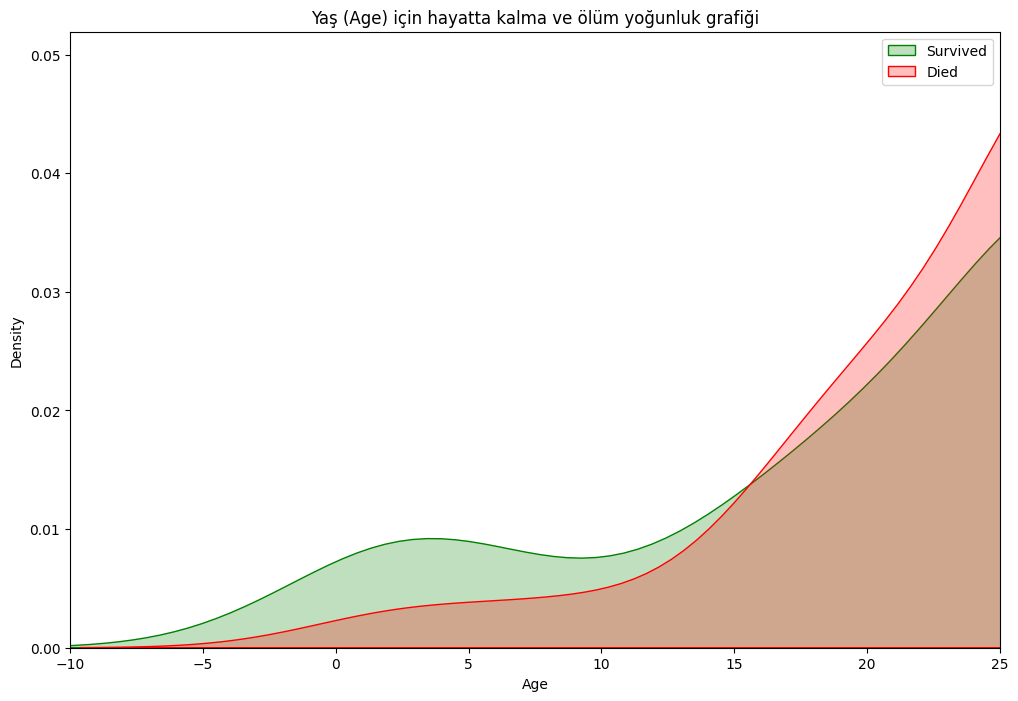

In [149]:
plt.figure(figsize=(12,8))

# Hayatta kalanlar -> Survived == 1
ax= sns.kdeplot(train_data["Age"][train_data.Survived == 1], color="green", shade=True)

# Ölenler -> Survived == 0
ax= sns.kdeplot(train_data["Age"][train_data.Survived == 0], color="red", shade=True)

plt.legend(["Survived", "Died"])
plt.title("Yaş (Age) için hayatta kalma ve ölüm yoğunluk grafiği")
ax.set(xlabel="Age")
plt.xlim(-10,25)
plt.show()